### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 7
### Due: Saturday, Apr 10th at 11.59pm CST
---

In [86]:
import numpy as np
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
from astroML.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression as skRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from astroML.linear_model import NadarayaWatson
from sklearn.gaussian_process import GaussianProcessRegressor
from astroML.linear_model import PolynomialRegression
from sklearn.model_selection import train_test_split

## Only one problem this week

This is a regression problem. Note of warning: the data I have provided have associated uncertainties, `yerr`. `sklearn` and `astroML` have different formats for using uncertainties; in `sklearn` fitting you can provide `sample_weight=1/yerr**2`, while in `astroML` fitting you can directly provide `y_error=yerr`.

1. Read in `hw7_data_1.npy`. The dataset should consist of $500$ samples. The first two columns are the two data features, `X`. The third column is the target labels, `y`, and the final column are the heteroscedastic uncertainties on the labels, `yerr`. Make a 2-panel scatter plot of the labels versus each feature.


2. Use multivariate linear regression on this data with its uncertainties (`astroML` rather than plain `sklearn` is the better option here). Print the best-fit intercept and slopes for the features. Make a prediction `Xgrid` over $50$ values from the min to the max value of each feature, and plot the best-fit model on a duplicate of the $2$-panel plot from (1); does this look like a good description of the data?


3. Make a new two-dimensional prediction meshgrid `Xgrid` over the $2$-D feature space, use your best-fit model to predict the labels, and make a $3$-D interactive plot showing the data and your best-fit over the entire space. You may find the following code useful.

In [ ]:
# Makes the plot interactive. 
# You can pan the image.
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(___, ___, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(___.flatten(), ___.flatten(), ___, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [ ]:
# To turn off interactive plotting
%matplotlib inline

4. Sticking with a linear model, now attempt a `GridSearchCV` procedure on the data to find the best `Ridge` regression hyper-parameters. Use the following `param_grid`:
```
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
```
What are the `best_params_` and the `best_score_` from this? Fit the data with the best options, and visualize interactively. Try `RidgeCV` also; what cross-validated `alpha_` does it return, and does this agree with `GridSeachCV`? *(Hint: remember to revert to inline matplotlib when you're done each time you make an interactive plot.)*


5. Perform Nadaraya-Watson regression on the data, using a Gaussian kernel with a bandwidth of $0.2$. Visualize interactively as before. How does this look compared to previous models?


6. Now model the data using Gaussian process regression and the default kernel. Check what the fit looks like with and with and without uncertainties accounted for. *(Hint: GPR in `sklearn` takes an `alpha` parameter equal to `(yerr/y)**2`.)*


7. Let's look finally at polynomial fitting. Fit a $4$th degree polynomial to the data. Print the best-fit regression coefficients, predict on the 2D meshgrid, and visualize interactively as before. How does this look compared to the linear model and GPR models?


8. Sticking with polynomial fitting, let's find the optimal hyper-parameters through cross-validation. 
- Using `sklearn.model_selection.train_test_split`, first do a train-test split with a `test_size` of $20\%$. Then split out a $20\%$ cross-validation set from the training set (leaving a somewhat smaller set to use for training). Note that you'll need to simultaneously split out `yerr` as well by just providing this as another array to `train_test_split`.
- Compute the training and cross-validation rms errors (and from those, the BIC values) as a function of polynomial degree from $1$ to $10$ inclusive. Plot the rms errors and BIC values as a function of the polynomial degree. 
- Choose the optimal polynomial degree, and train on all training data from the first `train_test_split` operation. Predict the labels of the held-out test set, and finally compute the testing rms error.

# Solution

1. Read in `hw7_data_1.npy`. The dataset should consist of $500$ samples. The first two columns are the two data features, `X`. The third column is the target labels, `y`, and the final column are the heteroscedastic uncertainties on the labels, `yerr`. Make a 2-panel scatter plot of the labels versus each feature.

(500, 4)


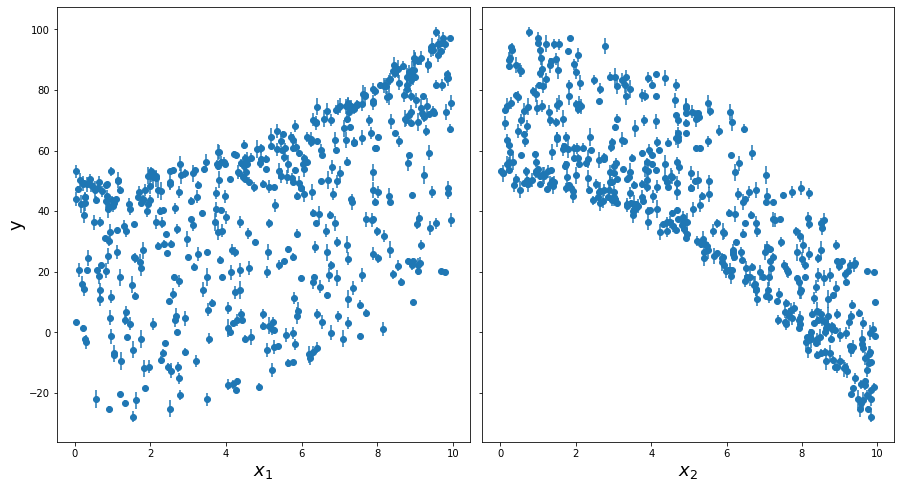

In [2]:
data=np.load('../../homeworks/hw_data/hw7_data_1.npy')
print(data.shape)

fig,axs=plt.subplots(nrows=1,ncols=2,sharey=True)
axs[0].errorbar(data[:,0],data[:,2],yerr=data[:,3],ls='none',marker='o')
axs[0].set_ylabel('y',fontsize=18)
axs[0].set_xlabel('$x_1$',fontsize=18)
axs[1].errorbar(data[:,1],data[:,2],yerr=data[:,3],ls='none',marker='o')
axs[1].set_xlabel('$x_2$',fontsize=18)

plt.subplots_adjust(wspace=0.03)

2. Use multivariate linear regression on this data with its uncertainties (`astroML` rather than plain `sklearn` is the better option here). Print the best-fit intercept and slopes for the features. Make a prediction `Xgrid` over $50$ values from the min to the max value of each feature, and plot the best-fit model on a duplicate of the $2$-panel plot from (1); does this look like a good description of the data?

Best-fit intercept: 57.1
Best-fit slope for x1: 4.9
Best-fit slope for x2: -8.3


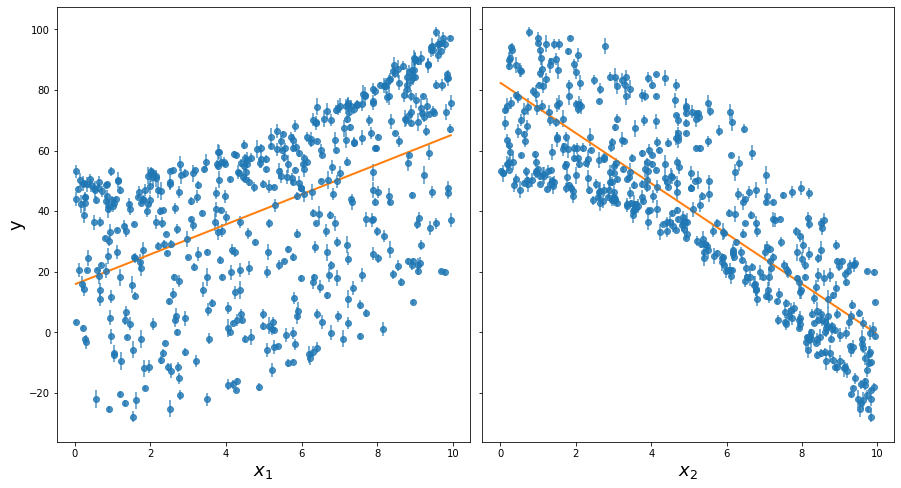

In [3]:
sampling_number=50

model = LinearRegression()

# model.fit takes the design matrix, the target vector, and the target error
# build design matrix
# Note astroML doesn't take an actual design matrix, just the training data
# so you don't need to add a column of 1s
X=np.zeros(shape=(data.shape[0],2)) #nrows=N, ncols=k
X[:,0]=data[:,0]
X[:,1]=data[:,1]
y=data[:,2]
yerr=data[:,3]


model.fit(X,y,yerr)

print('Best-fit intercept: {:.1f}'.format(model.coef_[0]))
print('Best-fit slope for x1: {:.1f}'.format(model.coef_[1]))
print('Best-fit slope for x2: {:.1f}'.format(model.coef_[2]))


x1grid=np.linspace(start=np.amin(X[:,0]),stop=np.amax(X[:,0]),num=sampling_number)
x2grid=np.linspace(start=np.amin(X[:,1]),stop=np.amax(X[:,1]),num=sampling_number)

# reconstruct target predictions, collapsing the non-plotted dimension onto its mean
y1pred=model.coef_[0]+model.coef_[1]*x1grid+model.coef_[2]*np.mean(X[:,1])
y2pred=model.coef_[0]+model.coef_[1]*np.mean(X[:,0])+model.coef_[2]*x2grid

fig,axs=plt.subplots(nrows=1,ncols=2,sharey=True)
axs[0].errorbar(X[:,0],y,yerr=yerr,ls='none',marker='o',alpha=0.8)
axs[0].plot(x1grid,y1pred,lw=2)
axs[0].set_ylabel('y',fontsize=18)
axs[0].set_xlabel('$x_1$',fontsize=18)
axs[1].errorbar(X[:,1],y,yerr=yerr,ls='none',marker='o',alpha=0.8)
axs[1].plot(x2grid,y2pred,lw=2)
axs[1].set_xlabel('$x_2$',fontsize=18)

plt.subplots_adjust(wspace=0.03)

<font color='blue'>The linear regression looks like a good fit. </font>

3. Make a new two-dimensional prediction meshgrid `Xgrid` over the $2$-D feature space, use your best-fit model to predict the labels, and make a $3$-D interactive plot showing the data and your best-fit over the entire space. You may find the following code useful.

In [14]:
def f(x1,x2):
    return model.coef_[0]+model.coef_[1]*x1+model.coef_[2]*x2

X1, X2 = np.meshgrid(x1grid, x2grid)
Y=f(X1,X2)

# Makes the plot interactive. 
# You can pan the image.
# For jupyterlab>3.0 you have to use %matplotlib widget
%matplotlib widget
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

#ax.plot(x1grid, x2grid, ypred, color='k', 
#        zorder=15, linestyle='none', 
#        marker='o', alpha=0.5)

ax.contour3D(X1, X2, Y, 50, cmap='viridis')

ax.scatter(X[:,0].flatten(), X[:,1].flatten(), y, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<font color='blue'>We can see the straight-line linear regression fit is actually quite good. Although the data does seem to have a slightly quadratic shape. </font>

In [15]:
%matplotlib inline

4. Sticking with a linear model, now attempt a `GridSearchCV` procedure on the data to find the best `Ridge` regression hyper-parameters. Use the following `param_grid`:
```
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
```
What are the `best_params_` and the `best_score_` from this? Fit the data with the best options, and visualize interactively. Try `RidgeCV` also; what cross-validated `alpha_` does it return, and does this agree with `GridSeachCV`? *(Hint: remember to revert to inline matplotlib when you're done each time you make an interactive plot.)*

In [24]:
ridge_params= {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd','lsqr']}
K = 5 # Do 5-fold cross validation
grid = GridSearchCV(Ridge(), param_grid=ridge_params, cv=K) # Try each bandwidth with K-folds
grid.fit(X,y,sample_weight=1/yerr**2)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.05, 0.1, 0.2, 0.5, 1.0],
                         'solver': ['svd', 'lsqr']})

In [25]:
print(grid.best_params_)

{'alpha': 1.0, 'solver': 'lsqr'}


In [26]:
print(grid.best_score_)

0.929182742615996


In [27]:
ridge_model=Ridge(alpha=1.0,solver='lsqr')
ridge_model.fit(X,y,sample_weight=1/yerr**2)

Ridge(solver='lsqr')

In [34]:
ridge_model.coef_

array([ 4.94668225, -8.29685933])

In [43]:
#def f(x1,x2):
    
#    return 

#X1, X2 = np.meshgrid(x1grid, x2grid)
#Y=f(X1,X2)


Xgrid=np.zeros(shape=(sampling_number**2,2))
count=0
for x1_val in x1grid:
    for x2_val in x2grid:
        Xgrid[count,0]=x1_val
        Xgrid[count,1]=x2_val
        count+=1


ridge_ypred=ridge_model.predict(Xgrid)

# Makes the plot interactive. 
# You can pan the image.
# For jupyterlab>3.0 you have to use %matplotlib widget
%matplotlib widget
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(Xgrid[:,0], Xgrid[:,1], ridge_ypred, color='k', 
        zorder=15, linestyle='none', 
        marker='o',alpha=0.1)

#ax.contour3D(X1, X2, Y, 50, cmap='viridis')

ax.scatter(X[:,0].flatten(), X[:,1].flatten(), y, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [44]:
%matplotlib inline

In [50]:
grid2=RidgeCV(alphas=[0.05,0.1,0.2,0.5,1.0],cv=K)
grid2.fit(X,y,sample_weight=1/yerr**2)
print('Cross-Validated best alpha: {:.1f}'.format(grid2.alpha_))

Cross-Validated best alpha: 1.0


<font color='blue'>RidgeCV returns the same cross-validated alpha value as GridSearchCV </font>

5. Perform Nadaraya-Watson regression on the data, using a Gaussian kernel with a bandwidth of $0.2$. Visualize interactively as before. How does this look compared to previous models?

In [54]:
nad_model=NadarayaWatson('gaussian',h=0.2)
nad_model.fit(X,y,dy=yerr)

NadarayaWatson(h=0.2)

In [57]:
nad_ypred=nad_model.predict(Xgrid)

# Makes the plot interactive. 
# You can pan the image.
# For jupyterlab>3.0 you have to use %matplotlib widget
%matplotlib widget
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(Xgrid[:,0], Xgrid[:,1], nad_ypred, color='k', 
        zorder=15, linestyle='none', 
        marker='o',alpha=0.1)

#ax.contour3D(X1, X2, Y, 50, cmap='viridis')

ax.scatter(X[:,0].flatten(), X[:,1].flatten(), y, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<font color='blue'>The gaussian kernel regression is able to match the shape of the data much more accurately. </font>

In [77]:
%matplotlib inline

6. Now model the data using Gaussian process regression and the default kernel. Check what the fit looks like with and with and without uncertainties accounted for. *(Hint: GPR in `sklearn` takes an `alpha` parameter equal to `(yerr/y)**2`.)*

In [78]:
# first without uncertainties
gpr_model_noerr=GaussianProcessRegressor()
gpr_model_noerr.fit(X,y)

GaussianProcessRegressor()

In [79]:
gpr_ypred_noerr=gpr_model_noerr.predict(Xgrid)

# Makes the plot interactive. 
# You can pan the image.
# For jupyterlab>3.0 you have to use %matplotlib widget
%matplotlib widget
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(Xgrid[:,0], Xgrid[:,1], gpr_ypred_noerr, color='k', 
        zorder=15, linestyle='none', 
        marker='o',alpha=0.1)

#ax.contour3D(X1, X2, Y, 50, cmap='viridis')

# need to set max ylim here
ax.set_zlim(0,100)
ax.scatter(X[:,0].flatten(), X[:,1].flatten(), y, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [80]:
%matplotlib inline

In [81]:
# now with uncertainties
gpr_model=GaussianProcessRegressor(alpha=(yerr/y)**2)
gpr_model.fit(X,y)

GaussianProcessRegressor(alpha=array([5.43958419e-04, 3.82759381e-03, 2.60103805e-03, 2.46808730e-03,
       2.65163908e-03, 7.72589348e-04, 1.94817688e-04, 1.67119428e-03,
       6.29160455e-04, 1.53546820e-01, 1.27737611e-03, 4.20743877e-04,
       9.07897153e-04, 1.19348513e-03, 8.23124925e-04, 3.83465716e-04,
       1.52017790e-02, 3.22812075e-04, 3.96160284e+00, 2.98167220e-04,
       4.15652792e-...
       5.38316976e-03, 2.98487981e-03, 7.32974682e-04, 6.94997156e-04,
       5.60561794e-04, 1.10015907e-03, 1.96438887e-03, 5.60292527e-04,
       4.86844042e-04, 3.39426983e-03, 9.75449577e-04, 1.98896826e-03,
       2.24641604e-02, 1.39104618e-03, 2.04290182e-04, 3.06679145e-01,
       7.75266081e-02, 4.07800587e-01, 3.80148249e-03, 1.58631739e-04,
       2.63246735e-03, 2.62188069e-01, 1.18655825e-03, 1.04916023e-02]))

In [82]:
gpr_ypred=gpr_model.predict(Xgrid)

# Makes the plot interactive. 
# You can pan the image.
# For jupyterlab>3.0 you have to use %matplotlib widget
%matplotlib widget
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(Xgrid[:,0], Xgrid[:,1], gpr_ypred, color='k', 
        zorder=15, linestyle='none', 
        marker='o',alpha=0.1)

#ax.contour3D(X1, X2, Y, 50, cmap='viridis')

# need to set max ylim here
ax.set_zlim(0,100)
ax.scatter(X[:,0].flatten(), X[:,1].flatten(), y, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [83]:
%matplotlib inline

<font color='blue'>The Gaussian Process Regression fit is much better when accounting for uncertainties. The model fits the data extremely well, but looks to be over-fit </font>

7. Let's look finally at polynomial fitting. Fit a $4$th degree polynomial to the data. Print the best-fit regression coefficients, predict on the 2D meshgrid, and visualize interactively as before. How does this look compared to the linear model and GPR models?

In [76]:
poly_model=PolynomialRegression(degree=4)
poly_model.fit(X,y,y_error=yerr)

print(poly_model.coef_)
# extra coefficients are polynomial coefficients of cross-terms?

[ 4.99887582e+01  5.54313398e-01 -2.07866484e-01  2.86536907e-01
  2.93842380e-03 -7.82230112e-01  2.47603263e-02  2.45748271e-02
 -2.22233559e-02  9.68417971e-03 -9.95958746e-04 -1.12284370e-03
 -1.14462222e-03  2.10142159e-03 -1.08539159e-03]


In [84]:
poly_ypred=poly_model.predict(Xgrid)

# Makes the plot interactive. 
# You can pan the image.
# For jupyterlab>3.0 you have to use %matplotlib widget
%matplotlib widget
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(Xgrid[:,0], Xgrid[:,1], poly_ypred, color='k', 
        zorder=15, linestyle='none', 
        marker='o',alpha=0.1)

#ax.contour3D(X1, X2, Y, 50, cmap='viridis')

# need to set max ylim here
ax.set_zlim(0,100)
ax.scatter(X[:,0].flatten(), X[:,1].flatten(), y, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [85]:
%matplotlib inline

<font color='blue'> This fits better than the linear model, it probably has a worse chi-squared than the gpr model but I would say it fits the data better because it does not appear to be overfit. </font>

8. Sticking with polynomial fitting, let's find the optimal hyper-parameters through cross-validation. 
- Using `sklearn.model_selection.train_test_split`, first do a train-test split with a `test_size` of $20\%$. Then split out a $20\%$ cross-validation set from the training set (leaving a somewhat smaller set to use for training). Note that you'll need to simultaneously split out `yerr` as well by just providing this as another array to `train_test_split`.
- Compute the training and cross-validation rms errors (and from those, the BIC values) as a function of polynomial degree from $1$ to $10$ inclusive. Plot the rms errors and BIC values as a function of the polynomial degree. 
- Choose the optimal polynomial degree, and train on all training data from the first `train_test_split` operation. Predict the labels of the held-out test set, and finally compute the testing rms error.

In [89]:
# first do a train-test split with test_size 20%
Xtemp,Xtest,ytemp,ytest,yerrtemp,yerrtest=train_test_split(X,y,yerr,test_size=0.2)
# next split out a 20% cross-validation set from the training set
Xtrain,Xval,ytrain,yval,yerrtrain,yerrval=train_test_split(Xtemp,ytemp,yerrtemp,test_size=0.2)

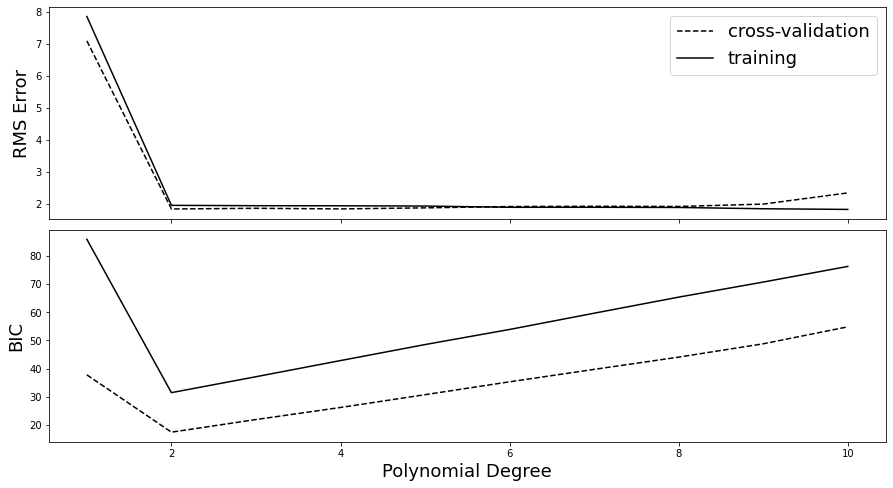

In [104]:
# compute the training and cross-validation rms errors (and BIC values) as a function of polynomial degree from 1 to 10
degrees=[1,2,3,4,5,6,7,8,9,10]

train_rms=[]
val_rms=[]
train_BIC=[]
val_BIC=[]

train_dy=np.mean(yerrtrain)
val_dy=np.mean(yerrval)

for i in degrees:
    poly_model=PolynomialRegression(degree=i)
    poly_model.fit(Xtrain,ytrain,y_error=yerrtrain)
    train_ypred=poly_model.predict(Xtrain)
    val_ypred=poly_model.predict(Xval)
    
    train_err=np.sqrt(np.sum((train_ypred - ytrain) ** 2)/ len(ytrain))
    val_err=np.sqrt(np.sum((val_ypred - yval) ** 2)/ len(yval))
    
    train_rms.append( train_err )
    val_rms.append( val_err )
    
    train_BIC.append( np.sqrt(len(ytrain))*train_err/train_dy+i*np.log(len(ytrain)) )
    val_BIC.append( np.sqrt(len(yval))*val_err/val_dy+i*np.log(len(yval)) )
    

    
    
# plot the rms errors and BIC values as a function of polynomial degree
fig,axs=plt.subplots(nrows=2,ncols=1,sharex=True)

axs[0].plot(degrees,val_rms,'--k',label='cross-validation')
axs[0].plot(degrees,train_rms,'-k',label='training')
axs[0].set_ylabel('RMS Error',fontsize=18)
axs[0].legend(loc='upper right',fontsize=18)
    
axs[1].plot(degrees,val_BIC,'--k')
axs[1].plot(degrees,train_BIC,'-k')
axs[1].set_xlabel('Polynomial Degree',fontsize=18)
axs[1].set_ylabel('BIC',fontsize=18)
plt.subplots_adjust(hspace=0.05)

In [106]:
# Choose the optimal polynomial degree, and train on all training data from the first `train_test_split` operation. 
opt_poly_model=PolynomialRegression(degree=2)
opt_poly_model.fit(Xtemp,ytemp,y_error=yerrtemp)

# Predict the labels of the held-out test set, and finally compute the testing rms error.
test_ypred=opt_poly_model.predict(Xtest)

test_err=np.sqrt(np.sum((test_ypred - ytest) ** 2)/ len(ytest))


print("RMS error for test-set: {:.1f}".format(test_err))

RMS error for test-set: 1.9


<font color='blue'> This is comparable to the cross-validation rms for degree=2</font>